In [1]:
from data_reader.data_reader import DataReader
from data_reader.helpers import locations
revenus=DataReader(
    path=locations("revenus"), 
    sheet_name='COM',
    skiprows=5, # Row nb. 6 will be the columns names
    insee_code=('CODGEO',),
    drop_domtom=True,
    arrondissement_handling="Delete"
).content()

In [2]:
revenus.head()

,LIBGEO,NBMENFISC13,NBPERSMENFISC13,MED13,PIMP13,TP6013,TP60AGE113,TP60AGE213,TP60AGE313,TP60AGE413,...,PPEN13,PPAT13,PPSOC13,PPFAM13,PPMINI13,PPLOGT13,PIMPOT13,RD13,D113,D913
insee,,,,,,,,,,,,,,,,,,,,,
01001,L'Abergement-Clémenciat,297.0,768.0,22130.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01002,L'Abergement-de-Varey,99.0,239.0,23213.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01004,Ambérieu-en-Bugey,6034.0,13599.0,19554.000000,57.0,15.0,18.0,19.0,19.0,13.0,...,25.4,19.8,5.9,2.6,1.6,1.7,-19.1,3.158667,10556.315789,33343.888889
01005,Ambérieux-en-Dombes,617.0,1693.0,22387.619048,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01006,Ambléon,47.0,102.5,21871.666667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Overall look at the file and its documentation :

This file relates the distribution of income in each town. It gives :

* The number of households
* The number of people in each household
* The median income 
* The rate of taxable households
* The poverty rate, further split by age class the house ownership
* The split between sources of income
* The wage gap between highest and lowest earners

It is not filled for every town, depending on their size :

* below 50 households, no information is given
* 50-1000, only median income & number of households/people are given
* Above everything is given, but the class split is given only if there are >200p (11 households) in each class

## Note from this notebook : It only gives information for metropolitan France !

In [3]:
revenus[revenus.index.str.startswith('97')].index.unique()

Index([], dtype='object', name='insee')

In [4]:
revenus[revenus.LIBGEO.str.contains('Paris')]

,LIBGEO,NBMENFISC13,NBPERSMENFISC13,MED13,PIMP13,TP6013,TP60AGE113,TP60AGE213,TP60AGE313,TP60AGE413,...,PPEN13,PPAT13,PPSOC13,PPFAM13,PPMINI13,PPLOGT13,PIMPOT13,RD13,D113,D913
insee,,,,,,,,,,,,,,,,,,,,,
38485,Seyssinet-Pariset,5347.0,12092.5,22043.000000,68.0,8.0,NaN,10.0,10.0,NaN,...,28.6,12.4,3.7,1.8,1.0,0.9,-17.6,2.955864,12876.551724,38061.333333
62826,Le Touquet-Paris-Plage,2942.0,5289.0,24048.000000,67.0,12.0,NaN,NaN,NaN,NaN,...,46.5,31.2,2.0,0.6,0.7,0.7,-28.7,5.590121,11436.000000,63928.620690
71343,Paris-l'Hôpital,118.0,277.5,21598.400000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75056,Paris,1038789.0,2109850.5,25981.333333,72.0,16.0,18.0,14.0,18.0,19.0,...,19.8,20.7,2.9,1.0,1.0,0.9,-27.9,6.570314,9652.000000,63416.666667
81202,Parisot,361.0,1016.5,21112.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82137,Parisot,241.0,526.5,16627.619048,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95176,Cormeilles-en-Parisis,9125.0,23845.5,25726.521739,77.0,9.0,14.0,11.0,9.0,8.0,...,21.2,9.7,3.2,1.9,0.6,0.7,-21.0,3.431450,12783.809524,43867.000000
95241,Fontenay-en-Parisis,642.0,1891.5,23395.238095,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
revenus[revenus.LIBGEO.str.contains('Arrondissement')]

,LIBGEO,NBMENFISC13,NBPERSMENFISC13,MED13,PIMP13,TP6013,TP60AGE113,TP60AGE213,TP60AGE313,TP60AGE413,...,PPEN13,PPAT13,PPSOC13,PPFAM13,PPMINI13,PPLOGT13,PIMPOT13,RD13,D113,D913
insee,,,,,,,,,,,,,,,,,,,,,


<AxesSubplot:title={'center':'Distribution of the median income per town'}, xlabel='Median income', ylabel='Frequency'>

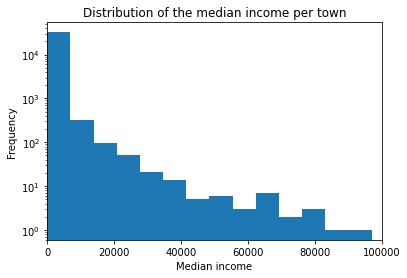

In [10]:
import matplotlib.pyplot as plt
plt.xlabel("Median income")
plt.xlim(0,100000)
plt.ylabel("Number of towns")
plt.yscale('log')
plt.title("Distribution of the median income per town")
revenus.NBMENFISC13.plot.hist(bins=150)

In [9]:
revenus.NBMENFISC13

insee
01001     297.0
01002      99.0
01004    6034.0
01005     617.0
01006      47.0
          ...  
95676     190.0
95678     333.0
95680    9085.0
95682      64.0
95690     139.0
Name: NBMENFISC13, Length: 36541, dtype: float64